In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from model import demonstrate

In [2]:
demonstrate()

Starting New Minibatch
tensor(76., device='cuda:0')
tensor(71., device='cuda:0')
tensor(74., device='cuda:0')
tensor(73., device='cuda:0')
tensor(63., device='cuda:0')
tensor(66., device='cuda:0')
tensor(73., device='cuda:0')
tensor(68., device='cuda:0')
tensor(70., device='cuda:0')
tensor(60., device='cuda:0')
tensor(71., device='cuda:0')
tensor(69., device='cuda:0')
tensor(66., device='cuda:0')
tensor(73., device='cuda:0')
tensor(78., device='cuda:0')
tensor(69., device='cuda:0')
tensor(80., device='cuda:0')
tensor(60., device='cuda:0')
tensor(67., device='cuda:0')
tensor(72., device='cuda:0')
Starting New Minibatch
tensor(69., device='cuda:0')
tensor(71., device='cuda:0')
tensor(67., device='cuda:0')
tensor(75., device='cuda:0')
tensor(70., device='cuda:0')
tensor(72., device='cuda:0')
tensor(66., device='cuda:0')
tensor(80., device='cuda:0')
tensor(70., device='cuda:0')
tensor(59., device='cuda:0')
tensor(62., device='cuda:0')
tensor(69., device='cuda:0')
tensor(64., device='cuda:0

tensor(14., device='cuda:0')
tensor(6., device='cuda:0')
tensor(10., device='cuda:0')
tensor(10., device='cuda:0')
tensor(12., device='cuda:0')
Starting New Minibatch
tensor(4., device='cuda:0')
tensor(12., device='cuda:0')
tensor(14., device='cuda:0')
tensor(10., device='cuda:0')
tensor(7., device='cuda:0')
tensor(12., device='cuda:0')
tensor(12., device='cuda:0')
tensor(13., device='cuda:0')
tensor(12., device='cuda:0')
tensor(9., device='cuda:0')
tensor(9., device='cuda:0')
tensor(12., device='cuda:0')
tensor(12., device='cuda:0')
tensor(9., device='cuda:0')
tensor(12., device='cuda:0')
tensor(13., device='cuda:0')
tensor(12., device='cuda:0')
tensor(12., device='cuda:0')
tensor(4., device='cuda:0')
tensor(9., device='cuda:0')
Starting New Minibatch
tensor(10., device='cuda:0')
tensor(7., device='cuda:0')
tensor(14., device='cuda:0')
tensor(9., device='cuda:0')
tensor(12., device='cuda:0')
tensor(7., device='cuda:0')
tensor(12., device='cuda:0')
tensor(11., device='cuda:0')
tensor(7

tensor(0., device='cuda:0')
tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
Starting New Minibatch
tensor(5., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(4., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(5., device='cuda:0')
tensor(1., device='cuda:0')
tensor(5., device='cuda:0')
tensor(3., device='cuda:0')
tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(4., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(4., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(5., device='cuda:0')
tensor(1., device='cuda:0')
Starting New Minibatch
tensor(1., device='cuda:0')
tensor(5., device='cuda:0')
tensor(3., device='cuda:0')
tensor(2., device='cuda:0')
tensor(2., device='cuda:0')
tensor(4., device='cuda:0')
tensor(1., device='cuda:0')
tensor(4., device='cuda:0')
te

tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
Starting New Minibatch
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(2., device='cuda:0')
Starting New Minibatch
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(2., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(2., device='cuda:0')
tensor(2., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
te

Starting New Minibatch
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
Starting New Minibatch
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(3., device='cuda:0')
tensor(1., device='cuda:0')
tensor(1., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
te

tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(2., device='cuda:0')
tensor(2., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(1., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')


In [3]:
import numpy as np
from matplotlib import pyplot as plt

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


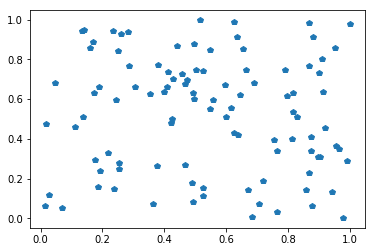

In [4]:
%matplotlib inline
n = 100
d = 2
X = np.hstack((np.random.random((n,d)), np.ones((n,1))))
w = np.random.random(d+1)
y = np.sign(w.dot(X.T))
print(y)
plt.plot(X[:,0], X[:,1], 'p')

In [5]:
def plot_perceptron(X,y,w):
    x1samples = [min(X[:,0]), max(X[:,0])]
    plt.plot(X[:,0], X[:,1], 'p')
    if w[1]!=0:
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples])

[0.01068401 0.79931656 0.0669562 ]


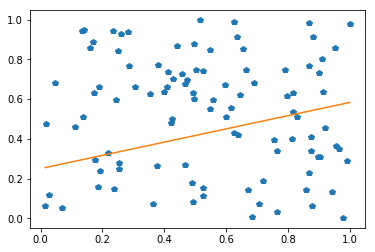

In [6]:
print(w)
w = np.array([-0.1, 0.3,-0.075])
y = np.sign(w.dot(X.T))

plot_perceptron(X,y,w)

In [ ]:
random_data[:,0] = random_data[:,0]
plt.plot(random_data[:,0], random_data[:,1], 'p')

In [ ]:
n=100
d=2
mu_1 = -0.5
sigma = 0.15
mu_2 = 0.5

pos = np.random.normal(loc = mu_1, scale= sigma, size = (n,d))
neg = np.random.normal(loc = mu_2, scale= sigma, size = (n,d))

In [ ]:
plt.plot(pos[:,0], pos[:,1], 'p')
plt.plot(neg[:,0], neg[:,1], 'p')

In [ ]:
import numpy as np
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from load_linearData import getLinearDataLoader
train_data, test_data, train, test = getLinearDataLoader(n=100, d=2, sigma = 0.15, test_split = 0.2, batch_size = 1, num_workers = 1)

#for i_batch, batch in enumerate(train):
#   print(i_batch, batch['input'], batch['label'])

In [ ]:
!python LinearModel.py

In [ ]:
from LinearModel import LinearNet
#load the model back
#torch.load_state_dict('model.ckpt', LinearNet(2,2,2))
model = LinearNet(2,2,2)
state_dict = torch.load('model.ckpt')
model.load_state_dict(state_dict)

In [ ]:
model.predict(torch.Tensor([[1,2]]))